In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_, m_train = X_train.shape

In [31]:
Y_train

array([0, 5, 3, ..., 4, 2, 0], dtype=int64)

In [21]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [73]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [69]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

In [70]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [57]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [74]:
def deriv_ReLU(Z):
    return Z > 0

In [59]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [75]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [61]:
def get_prediction(A2):
    return np.argmax(A2, 0)

In [62]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

In [76]:
def gradient_descent(X, Y, iteration, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iteration):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration", i)
            predictions = get_prediction(A2)
            print("Accuracy:", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [77]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration 0
[6 7 4 ... 9 7 9] [0 8 8 ... 1 8 3]
Accuracy: 0.10170731707317072
Iteration 50
[0 8 8 ... 8 6 0] [0 8 8 ... 1 8 3]
Accuracy: 0.47692682926829266
Iteration 100
[0 8 8 ... 8 6 0] [0 8 8 ... 1 8 3]
Accuracy: 0.6121463414634146
Iteration 150
[0 8 8 ... 8 6 2] [0 8 8 ... 1 8 3]
Accuracy: 0.6861463414634147
Iteration 200
[0 8 8 ... 8 6 2] [0 8 8 ... 1 8 3]
Accuracy: 0.7335365853658536
Iteration 250
[0 8 8 ... 8 6 2] [0 8 8 ... 1 8 3]
Accuracy: 0.7623170731707317
Iteration 300
[0 8 8 ... 1 6 2] [0 8 8 ... 1 8 3]
Accuracy: 0.7847804878048781
Iteration 350
[0 8 8 ... 1 6 2] [0 8 8 ... 1 8 3]
Accuracy: 0.8056829268292683
Iteration 400
[0 8 8 ... 1 6 2] [0 8 8 ... 1 8 3]
Accuracy: 0.8226829268292682
Iteration 450
[0 8 8 ... 1 6 2] [0 8 8 ... 1 8 3]
Accuracy: 0.8337073170731707


In [78]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

In [80]:
def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Prediction:  [7]
Label:  7


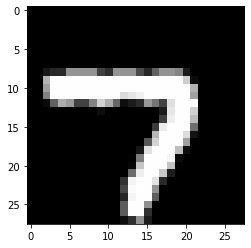

In [83]:
test_predictions(4, W1, b1, W2, b2)